# Image classification

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download and explore the dataset

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import pathlib
import os
data_dir='/content/drive/MyDrive/SWIFT/Mechanical Tools Image dataset/Mechanical Tools Image dataset/tools'
data_dir = pathlib.Path(data_dir)
os.listdir(data_dir)

['Screw_Driver', 'Hammer', '.ipynb_checkpoints', 'Wrench']

In [123]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/SWIFT/Mechanical Tools Image dataset/Mechanical Tools Image dataset/tools')

Found 1363 files belonging to 4 classes.


In [73]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1289


Here are some roses:

In [124]:
Hammer = list(data_dir.glob('Hammer/*'))



In [125]:
print(len(Hammer))

409


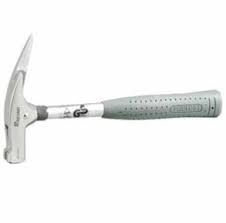

In [126]:
PIL.Image.open(str(Hammer[100]))

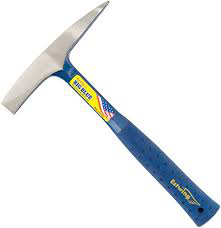

In [127]:
PIL.Image.open(str(Hammer[1]))

And some tulips:

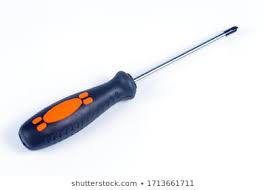

In [128]:

Screw_Driver = list(data_dir.glob('Screw_Driver/*'))
PIL.Image.open(str(Screw_Driver[0]))

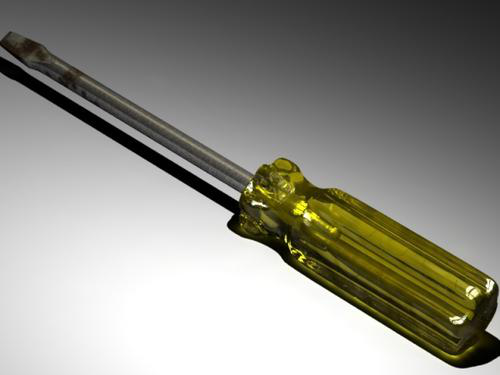

In [129]:
PIL.Image.open(str(Screw_Driver[1]))

### Create a dataset

In [130]:
batch_size = 32
img_height = 180
img_width = 180

In [131]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1363 files belonging to 4 classes.
Using 1091 files for training.


In [132]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1363 files belonging to 4 classes.
Using 272 files for validation.


In [133]:
class_names = train_ds.class_names
print(class_names)

['.ipynb_checkpoints', 'Hammer', 'Screw_Driver', 'Wrench']


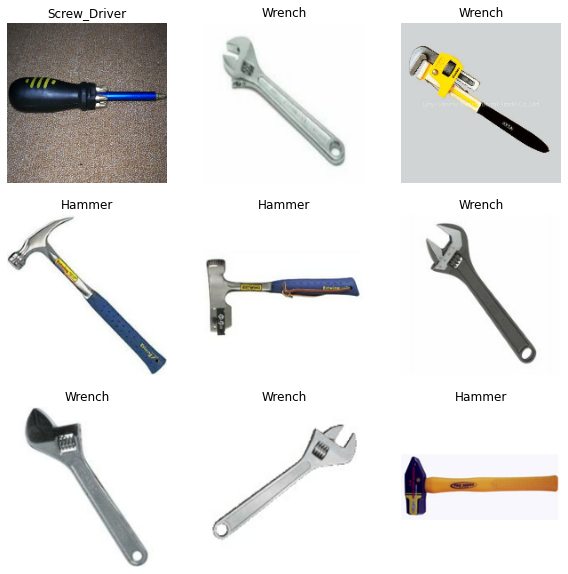

In [134]:
#visualise datset:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [135]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [136]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [137]:
normalization_layer = layers.Rescaling(1./255)

In [138]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03861428 1.0


In [139]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [140]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [142]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
35/35 [==============================] - 2s 44ms/step - loss: 1.1719 - accuracy: 0.4299 - val_loss: 1.0600 - val_accuracy: 0.4596
Epoch 2/10
35/35 [==============================] - 1s 25ms/step - loss: 0.7601 - accuracy: 0.6719 - val_loss: 0.9175 - val_accuracy: 0.6434
Epoch 3/10
35/35 [==============================] - 1s 24ms/step - loss: 0.5789 - accuracy: 0.7608 - val_loss: 0.6769 - val_accuracy: 0.7206
Epoch 4/10
35/35 [==============================] - 1s 24ms/step - loss: 0.4192 - accuracy: 0.8506 - val_loss: 0.6234 - val_accuracy: 0.7390
Epoch 5/10
35/35 [==============================] - 1s 24ms/step - loss: 0.2881 - accuracy: 0.9038 - val_loss: 0.7252 - val_accuracy: 0.7463
Epoch 6/10
35/35 [==============================] - 1s 24ms/step - loss: 0.1930 - accuracy: 0.9368 - val_loss: 0.7325 - val_accuracy: 0.7206
Epoch 7/10
35/35 [==============================] - 1s 24ms/step - loss: 0.1417 - accuracy: 0.9441 - val_loss: 0.8906 - val_accuracy: 0.7757
Epoch 8/10
35

## Visualize training results

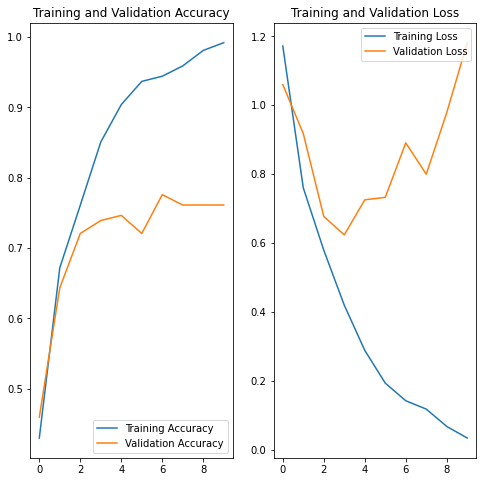

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Overfitting

## Data augmentation

In [144]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualize a few augmented examples by applying data augmentation to the same image several times:

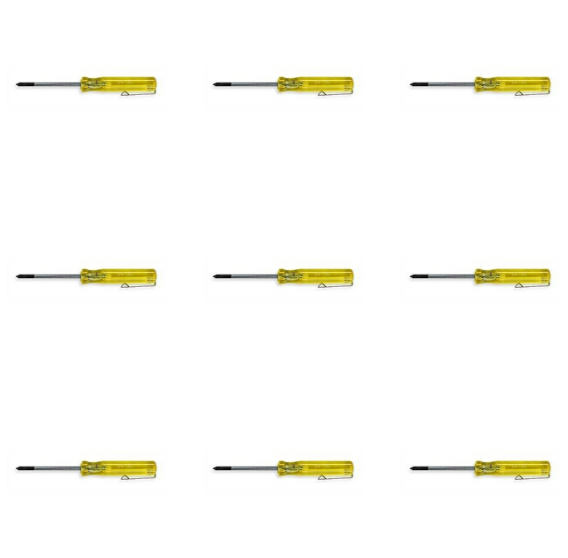

In [145]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

You will add data augmentation to your model before training in the next step.

In [146]:
#DROPOUT  
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [147]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [149]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
35/35 [==============================] - 3s 49ms/step - loss: 1.2034 - accuracy: 0.4390 - val_loss: 0.9914 - val_accuracy: 0.5515
Epoch 2/20
35/35 [==============================] - 1s 42ms/step - loss: 0.9598 - accuracy: 0.5545 - val_loss: 0.9315 - val_accuracy: 0.5882
Epoch 3/20
35/35 [==============================] - 1s 42ms/step - loss: 0.8696 - accuracy: 0.6187 - val_loss: 0.9724 - val_accuracy: 0.5221
Epoch 4/20
35/35 [==============================] - 1s 42ms/step - loss: 0.8151 - accuracy: 0.6535 - val_loss: 0.8456 - val_accuracy: 0.6507
Epoch 5/20
35/35 [==============================] - 2s 44ms/step - loss: 0.7895 - accuracy: 0.6691 - val_loss: 0.7634 - val_accuracy: 0.6654
Epoch 6/20
35/35 [==============================] - 1s 41ms/step - loss: 0.7186 - accuracy: 0.6929 - val_loss: 0.7493 - val_accuracy: 0.6618
Epoch 7/20
35/35 [==============================] - 1s 41ms/step - loss: 0.6812 - accuracy: 0.7149 - val_loss: 0.6954 - val_accuracy: 0.7169
Epoch 8/20
35

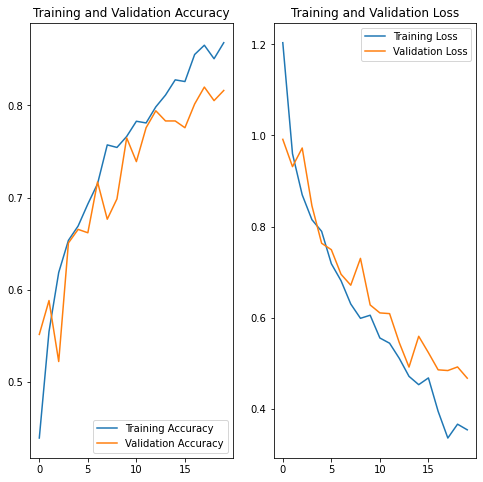

In [150]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Use your model to classify an image that wasn't included in the training or validation sets.

In [162]:
#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
tool_dir='/content/drive/MyDrive/SWIFT/screwdr.jpg'
img = tf.keras.utils.load_img(tool_dir , target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to Screw_Driver with a 94.04 percent confidence.
